# Part 1 - Last Day

ဒီနေ့ဟာ Data Science Using Python - Part 1 ရဲ့ နောက်ဆုံးနေ့ week 12 - day 2 ဖြစ်ပါတယ်။ 

## Review

သိပြီးသမျှကို Review အနေနဲ့ ပြန်ပြောရရင် [Recipe အခု 20 ကို ဒီမှာ ရယူနိုင်ပါတယ်။](https://drive.google.com/file/d/19PU3XrrIDCMKy4eFaZJTZpEA9rCmQGuj/view?usp=sharing)

သင်တန်းသားတွေ အနေနဲ့ အောက်ပါတို့ကို (Google ရှာပြီးဖြစ်ဖြစ် stack overflow မှာ ရှာပြီးဖြစ်ဖြစ် copy/paste လုပ်တာပဲဖြစ်ဖြစ်) လုပ်တတ်သင့်ပါပြီ။ 

ကိုယ့်ဟာကိုယ် မညာတမ်း ပြန်ဖြေကြည့်ပါ။ မရသေးရင် စမ်းပါ။

1. Data တွေကို manipulate လုပ်တာ၊ slice/dice/selection etc. 
2. Linear equations/non-linear equations တွေကို ရှင်းတာ၊ minimise လုပ်တာ

Assignment 1 (week 8) က ဒီ ၂ ခုကို check တာဖြစ်တယ်။

3. သင်္ချာ function တခုကို python နဲ့ရေးတာ။ python code အစိမ်းတွေ့ရင် ဖတ်တတ်တာ။ 
4. Regression/classification/clustering တွေ ဘယ်လိုကွဲသလဲ ရှင်းပြနိုင်တာ။

5. Linear regression/logistic regression/kmeans clustering model တွေဆောက်တာ၊ အဲဒီ model တွေရဲ့ performance ကိုတိုင်းတာ။ အဲဒီ‌ model တွေရဲ့ အရေးကြီးတဲ့ hyperparameter တွေကိုပြောင်းတာ၊ ပြန် train တာ။

Assignment 2 (week 10) က ဒါကို တပိုင်းတစ စစ်ဆေးတာ ဖြစ်တယ်။

Part 1 ရဲ့အဆုံး project က ဒီ ၅ ပိုင်းလုံး ကျွမ်းကျင်မှ လုပ်နိုင်လိမ့်မယ်။ 

## 

In [1]:
import numpy as np

np.arange(100)[::1]

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

## Part 1 - Project

### Deliverables

[MNIST dataset](http://yann.lecun.com/exdb/mnist/) အပေါ်မှာ အောက်ပါ model တွေကို ဆောက်ပြီး ရလာတဲ့ Parameter/Classification Report တွေကို တင်ပြရမှာဖြစ်တယ်။ 

1. `LogisticRegression` model set 1

* Use center/middle 18x18 pixels and only 30,000 samples. All parameters being equal with `penalty` = "elasticnet". Set `l1_ratio` to [0.0, 0.2, 0.5, 0.8, 1.0].

2. `LogisticRegression` model set 2

* Use center/middle 18x18 pixels and only 30,000 samples. All parameters being equal with 5 different values for C. Set `penalty` to the one that gives best `f1_score` from item 1.

3. Augmenting with more **feature engineering**

* Get odd columns and odd rows of all the **60,000** images (i.e. `X[:, 1::2, 1::2]`). Put that into `scipy.linalg.svd` and get 100 most important features. 
* Get 300 most important features from 2 using `coef_`. Put these into `KMeans` to obtain 100 clusters. Use distance to the centroids as additional features. 
* Combine the aboves to get 200 features. Use that to train a new set of `LogisticRegression` model with 5 different values for C. Use "elasticnet" and set `l1_ratio` to [0.5]
    * Is this new model's Classification Report better than those from 1 ?
    * Is this new model's Classification Report better than those from 2 ? 

4. Use Convolution to reduce dimension of dataset to 18x18. 

* Build 5 models with this data alone. 
* Add the 200 features obtained above in the data. Repeat the 5 models. Does this additional features improve `f1-score` ? 


In [1]:
%matplotlib inline
import importlib

import numpy as np
from scipy import linalg 

from matplotlib import pyplot as plt

from sklearn import datasets
from sklearn import linear_model
from sklearn import metrics
from sklearn import model_selection
from sklearn import cluster

import utils

In [2]:
from keras.datasets import mnist

(train_X, train_y), (test_X, test_y) = mnist.load_data()

print('train_X: ' + str(train_X.shape))
print('train_y: ' + str(train_y.shape))
print('test_X:  '  + str(test_X.shape))
print('test_y:  '  + str(test_y.shape))

train_X: (60000, 28, 28)
train_y: (60000,)
test_X:  (10000, 28, 28)
test_y:  (10000,)


In [3]:
from tqdm.auto import tqdm

In [ ]:
def get_k(X, k=30000):
    return X[:k]

def flatten(X):
    return X.reshape(-1, X.shape[1] * X.shape[2])

def make_18_x_18(X):
    return X[:, 5:-5, 5:-5]

tr_X1 = make_18_x_18(train_X)
tr_X1 = flatten(tr_X1)
tr_X1 = get_k(tr_X1)
ts_X1 = make_18_x_18(test_X)
ts_X1 = flatten(ts_X1)
ts_X1 = get_k(ts_X1)

tr_y1 = get_k(train_y)

l1_ratios = [0.0, 0.2, 0.5, 0.8, 1.0]
models_1 = []
for l1_ratio in tqdm(l1_ratios):
    model = linear_model.LogisticRegression(
        penalty="elasticnet", 
        C=1.0/5000,
        l1_ratio=l1_ratio,
        multi_class="ovr",
        solver="saga",
        random_state=42,
        max_iter=5000,
        n_jobs=4,
        verbose=1
    )
    model.fit(tr_X1, tr_y1)

    y_pred = model.predict(ts_X1)
    y_pred_proba = model.predict_proba(ts_X1)
    classification_report = metrics.classification_report(y_true=test_y, y_pred=y_pred)
    models_1.append({
        "model": model, 
        "classification_report": classification_report,
        "y_pred": y_pred,
        "y_pred_proba": y_pred_proba
    })
    print ("---")
    print (model)
    print (classification_report)
print ("done")

In [ ]:
import pickle

with open ("model_set_1.bin", "wb") as f:
    pickle.dump(models_1, f, protocol=pickle.HIGHEST_PROTOCOL)

In [4]:
def get_odds(X, k=30000):
    return X[:k]

def flatten(X):
    return X.reshape(-1, X.shape[1] * X.shape[2])

def make_18_x_18(X):
    return X[:, 5:-5, 5:-5]

tr_X2 = flatten(train_X)
ts_X2 = flatten(test_X)

tr_y2 = train_y.copy()

In [97]:
from scipy import linalg
svd_results = {}
k = 10
n_classes = 10
pbar = tqdm(list(range(0, 10)))
for y_value in pbar:
    pbar.set_description("working on y_value : {}".format(y_value))
    selector = tr_y2 == y_value
    X_ = tr_X2[selector].T
    pbar.set_description("y_value : {} ; X_ shape is : {}".format(y_value, X_.shape))
    U, s, Vt = linalg.svd(X_)
    S = linalg.diagsvd(s[:k], k, k)
    U_ = U[:, :k]
    Ut_ = U_.T
    inv_of_Ut_xU_ = linalg.inv(Ut_ @ U_)
    inv_of_Ut_xU_xUt_ = inv_of_Ut_xU_ @ Ut_
    svd_results[y_value] = {
        "U": U,
        "Vt": Vt,
        "s" : S,
        "Ut_": Ut_, 
        "inv_of_Ut_xU_xUt_": inv_of_Ut_xU_xUt_,
        "selector": selector
    }

y_value : 9 ; X_ shape is : (784, 5949): 100%|██████████| 10/10 [00:22<00:00,  2.24s/it]


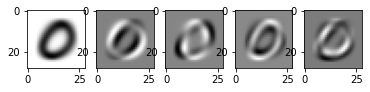

[[0 0 0 0 0]]


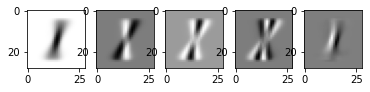

[[1 1 1 1 1]]


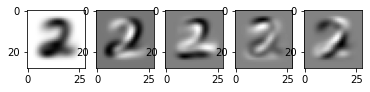

[[2 2 2 2 2]]


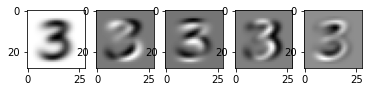

[[3 3 3 3 3]]


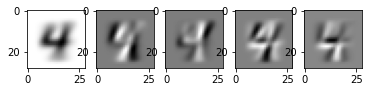

[[4 4 4 4 4]]


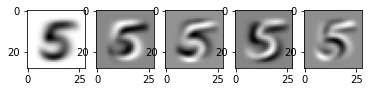

[[5 5 5 5 5]]


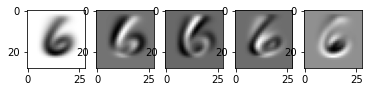

[[6 6 6 6 6]]


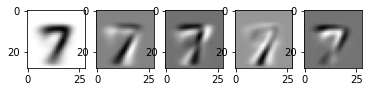

[[7 7 7 7 7]]


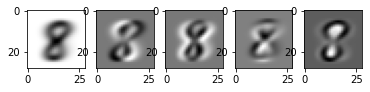

[[8 8 8 8 8]]


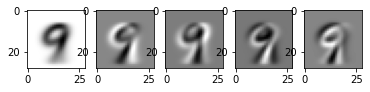

[[9 9 9 9 9]]


In [110]:
for y_value in range(0, 10):
    utils.visualize(svd_results[y_value]["Ut_"][0:5].reshape(-1, 28, 28), y=[y_value]*5)

In [111]:
features_X = []
pbar = tqdm(list(range(0, 10)))
for y_value in pbar:
    pbar.set_description("calculating features for : {}".format(y_value))
    svd_result = svd_results[y_value]
    inv_of_Ut_xU_xUt_, Ut_ = svd_result["inv_of_Ut_xU_xUt_"], svd_result["Ut_"]
    X_ = (inv_of_Ut_xU_xUt_ @ tr_X2.T).T
    features_X.append(X_)
print("concating all features ... ")
tr_X3 = np.hstack(tuple(features_X))
tr_X3.shape

calculating features for : 9: 100%|██████████| 10/10 [00:01<00:00,  7.12it/s]

concating all features ... 


(60000, 100)

In [112]:
tr_y3 = train_y

In [115]:
model_3 = linear_model.LogisticRegression(
    penalty="elasticnet", 
    C=1.0/5000,
    l1_ratio=0.2,
    multi_class="ovr",
    solver="saga",
    random_state=42,
    max_iter=5000,
    n_jobs=4,
    verbose=1
)
model_3.fit(tr_X3, tr_y3)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


convergence after 320 epochs took 33 seconds
convergence after 326 epochs took 34 seconds
convergence after 370 epochs took 37 seconds
convergence after 370 epochs took 38 seconds
convergence after 358 epochs took 37 seconds
convergence after 415 epochs took 42 seconds
convergence after 449 epochs took 47 seconds
convergence after 504 epochs took 51 seconds
convergence after 330 epochs took 32 seconds
convergence after 460 epochs took 46 seconds


[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:  1.9min finished


LogisticRegression(C=0.0002, l1_ratio=0.2, max_iter=5000, multi_class='ovr',
                   n_jobs=4, penalty='elasticnet', random_state=42,
                   solver='saga', verbose=1)

In [117]:
ts_features_X = []
pbar = tqdm(list(range(0, 10)))
for y_value in pbar:
    pbar.set_description("calculating features for : {}".format(y_value))
    svd_result = svd_results[y_value]
    inv_of_Ut_xU_xUt_, Ut_ = svd_result["inv_of_Ut_xU_xUt_"], svd_result["Ut_"]
    X_ = (inv_of_Ut_xU_xUt_ @ ts_X2.T).T
    ts_features_X.append(X_)
print("concating all features ... ")
ts_X3 = np.hstack(tuple(ts_features_X))
ts_X3.shape

calculating features for : 9: 100%|██████████| 10/10 [00:00<00:00, 45.64it/s]

concating all features ... 


(10000, 100)

In [118]:
y_pred = model_3.predict(ts_X3)
y_pred_proba = model_3.predict_proba(ts_X3)
classification_report = metrics.classification_report(y_true=test_y, y_pred=y_pred)

print ("---")
print (model_3)
print (classification_report)
print ("done")

---
LogisticRegression(C=0.0002, l1_ratio=0.2, max_iter=5000, multi_class='ovr',
                   n_jobs=4, penalty='elasticnet', random_state=42,
                   solver='saga', verbose=1)
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       980
           1       0.97      0.98      0.97      1135
           2       0.93      0.88      0.90      1032
           3       0.89      0.90      0.90      1010
           4       0.90      0.92      0.91       982
           5       0.90      0.82      0.86       892
           6       0.93      0.95      0.94       958
           7       0.92      0.91      0.92      1028
           8       0.83      0.88      0.85       974
           9       0.89      0.86      0.88      1009

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000

done
